# LEAFToolbox for Sites
Applies the LEAF-ToolBox for mapping vegetation using satellite imagery over a list of sites, each defined using time stamped vector geographical objects.
Cite as Fernandes, R. et al., 2021, "LEAF Toolbox", Canada Centre for Remote Sensing, https://github.com/rfernand387/LEAF-Toolbox/wiki, DOI: 10.5281/zenodo.4321298.


LEAF currently supports two algorithms: 
SL2PV0 is the algorithm defined by Weiss and Baret (2016) with an update in Weiss and Baret (2020).  
SL2PV1 defined in Fernandes et al. 2023 that attempts to correct for biases over forests observed in SL2PV1.


Note: This is an exact copy of the Javascript version of the LEAF-ToolBox-SL2P for image by image products as implemented on December 1, 2023 17:21 EST: https://code.earthengine.google.com/8ee611fad1609740099eabbfe571189c. You will need a Google Earth Engine Account linked to a Google Account with sufficient disk space for the output.

Refer to https://github.com/rfernand387/LEAF-Toolbox/tree/master/Source-Python for configuration of anaconda environment.


Weiss, M. and Baret, F. 2016. S2ToolBox Level 2 products: LAI, FAPAR, FCOVER, 1.1. ed.
Institut National de la Recherche Agronomique, Avignon, France. https://step.esa.
int/docs/extra/ATBD_S2ToolBox_L2B_V1.1.pdf.

Weiss, M., and Baret, F., 2020. S2ToolBox Level 2 Products: LAI, FAPAR, FCOVER, 2.0. ed.
Institut National de la Recherche Agronomique, Avignon, France. https://step.esa.
int/docs/extra/ATBD_S2ToolBox_L2B_V2.0.pdf.

Fernandes et al., 2023. Evidence of a bias-variance tradeoff when mapping LAI over forests using Sentinel-2 imagery.  subitted to RSE>


## Setup Environment

In [2]:
# Provide your GEE authentificaton
import ee
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AfJohXne3E_DHGRtZ8cXoDVFarXurGvSQZwR_EYVNrwOzz5-6kc2-qSp-F0

Successfully saved authorization token.


In [671]:
# Uncomment this if you are modifying modules
# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [780]:
# import LEAF modules
import LEAF

# import algorith definitions
import SL2PV0 
import SL2PV1

## Specify Sites to Process

Sites correspond to readable Google Earth Engine Feature collections under which samples will be extracted.
If the features have time stamps as properties the sampling interval can be restricted on a feature by feature basis.
Otherwise the sampling interval must be specified the same for all features.

In [814]:
# List of GEE feature collections
# siteList=["projects/ee-modis250/assets/HuntClub","projects/ee-modis250/assets/Nanaimo","projects/ee-modis250/assets/Karachi"]
siteList = ["projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_0",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_1",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_2",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_3",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_4",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_5",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_6",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_7",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_8",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_9",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_10",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_11",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_12",
            "projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed_14",
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_HayRiverv3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_Labradorv3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_MerBleuv3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_MtPolleyv3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_PeaceRiverv3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_TurkeyPointv3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_VancouverIslandv3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_Yellowknifev3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3",\
             "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2021_NovaScotiav3"]

## Run LEAF 

In [ ]:
# Function definition
#
# LEAF.sampleSites
# sitesDictionary = LEAF.sampleSites( siteList, \
#                                     imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
#                                     algorithm=SL2PV0, \
#                                     variableName="LAI",\
#                                     maxCloudcover=90,\
#                                     outputScaleSize=20,\
#                                     inputScaleSize=20,\
#                                     bufferSpatialSize = 0,\
#                                     bufferTemporalSize = [0,0], 
#                                     subsamplingFraction=1)
#                                   
# Applies a LEAF toolbox algorithm to map a canopy variable for all clear sky unmasked pixels from an input image collection
# falling within the spatial and temporal extents of features in a list of sites.  The spatial extent of features is defined by their GEE geometry.  
# The temporal extent of features is defined by their "system:time_start" and "system:time_end" properties or user defined otherwise.
#
# Parameters:
#
# siteList: list of readable GEE feature collection assets.  Features must have a system:time_start and system:time_end property.
# imageCollection: input image collection from one of the list defined by GEE
#                 ["COPERNICUS/S2_SR_HARMONIZED","COPERNICUS/S2_SR_HARMONIZED_10m","LANDSAT/LC08/C02/T1_L2","LANDSAT/LC09/C02/T1_L2","NASA/HLS/HLSL30/v002"]
# algorith: python module specifying LEAF algorithm to apply , currently one of list ["SL2PV0","SL2PV1"]
# variableName: variable to be mapped from one of the list ["ALBEDO","FAPAR","FCOVER","LAI","CWC","CCC","DASF"] defined by https://github.com/rfernand387/LEAF-Toolbox/wiki/Visualisation-Outputs              
# maxCloudCover: maximum input image cloud cover percentage [0,100]
# filterSize: width (m) of square filter applied to output
# scaleSize: scale (m) applied to output imagery after applying algorithm (refer to https://developers.google.com/earth-engine/guides/scale)
# inputScaleSize: scale (m) applied to input imagery before applying algorithm (refer to https://developers.google.com/earth-engine/guides/scale)
# bufferSpatialSize: width (m) of spatial buffer applied to features prior to sampling
# bufferTemporalSize: dilation (d) of start and end time of sampled features OR temporal interval ["YYYY-MM-DD","YYYY-MM-DD"[ of start and end of time interval to sample.  
# subsamplingFraction: fraction (0 to 1) of pixels to sample within a feature on any given image
#                                                                                                                          
# Output:
#
# sitesDictionary: dictionary with keys corresponding to sites and structure.  The value of each key is a dictionary with two keys:
#                     'feature' : properties of the sampled feature
#                     'SL2PV0' or 'SL2PV1' : a pandas data frame where columns correspond to algorithm output properties and rows correspond to a retrieval within the time and spatial interval of the feature               

In [ ]:
#Landsat 8
sitesDictionaryL08SR = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 45,\
                                                bufferTemporalSize =[-7,7],  \
                                                subsamplingFraction = 1, \
                                                outputFileName="f:/modisLandsat/L08SRsamples.pkl") 


STARTING LEAF IMAGE for  LANDSAT/LC08/C02/T1_L2 
 
Site:  projects/ee-modis250/assets/validationGBOV/COPERNICUS_GBOV_RM7_20220616174529  with  7559  features.
no end date 2021-10-28 20:00:00
Processing feature: 0  from  2021-10-21 20:00:00  to  2021-11-04 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-05 20:00:00
Name: 0, dtype: datetime64[ns]
check output: 0
pickling
no end date 2021-10-27 20:00:00
Processing feature: 1  from  2021-10-20 20:00:00  to  2021-11-03 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-04 20:00:00
Name: 0, dtype: datetime64[ns]
check output: 0
pickling
no end date 2021-10-26 20:00:00
Processing feature: 2  from  2021-10-19 20:00:00  to  2021-11-02 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-03 20:00:00
Name: 0, dtype: datetime64[ns]
check output: 0
pickling
no end date 2021-10-25 20:00:00
Processing feature: 3  from  2021-10-18 20:00:00  to  2021-11-01 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-02 2

In [819]:
with open("f:/modisLandsat/L08SRsamples.pkl", 'rb') as f:
    loaded_dict = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'f:/modisLandsat/L08SRsamples.pkl'

In [808]:
print(sitesDictionaryL08LAI['projects/ee-modis250/assets/HuntClub'][0]['SL2PV0'])

             date  QC  longitude   latitude  estimateLAI  partition  \
0   1593877826749   0 -75.793952  45.307435     0.720847         15   
1   1593877826749   0 -75.793569  45.307437     0.728380         15   
2   1593877826749   0 -75.793187  45.307440     0.743330         15   
3   1593877826749   0 -75.793956  45.307705     0.720347         15   
4   1593877826749   0 -75.793573  45.307707     0.728939         15   
5   1593877826749   0 -75.793190  45.307710     0.737089         15   
6   1593877850632   0 -75.793952  45.307435     0.720141         15   
7   1593877850632   0 -75.793569  45.307437     0.727298         15   
8   1593877850632   0 -75.793187  45.307440     0.742236         15   
9   1593877850632   0 -75.793956  45.307705     0.718512         15   
10  1593877850632   0 -75.793573  45.307707     0.727743         15   
11  1593877850632   0 -75.793190  45.307710     0.736788         15   

    networkID  errorLAI  
0           0  0.282482  
1           0  0.297059 

### Sample Surface Reflectance from various sensors over sites

In [800]:
#Landsat 8
sitesDictionaryL08SR = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 45,\
                                                bufferTemporalSize =[-7,7],  \
                                                subsamplingFraction = 1, \
                                                outputFileName="f:/modisValidation/L08SRsamples") 
# Landsat 9
sitesDictionaryL09SR = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC09/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 45,\
                                                bufferTemporalSize =[-7,7],  \
                                                subsamplingFraction = 1, \
                                                outputFileName="f:/modisValidation/L09SRsamples") 
# #HLS
# sitesDictionaryHLSSR = LEAF.sampleSites(siteList, \
#                                                 imageCollectionName="NASA/HLS/HLSL30/v002",\
#                                                 algorithm=SL2PV0, 
#                                                 variableName="Surface_Reflectance",\
#                                                 maxCloudcover=90,
#                                                 outputScaleSize=30,\
#                                                 inputScaleSize=30,\
#                                                 bufferSpatialSize = 0,\
#                                                 bufferTemporalSize =["2021-04-01","2022-10-01"],  \
#                                                 subsamplingFraction = 0.99)         

# # S2
# sitesDictionaryS2SR = LEAF.sampleSites(siteList, \
#                                                 imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
#                                                 algorithm=SL2PV0, 
#                                                 variableName="Surface_Reflectance",\
#                                                 maxCloudcover=90,
#                                                 outputScaleSize=20,\
#                                                 inputScaleSize=20,\
#                                                 bufferSpatialSize = 0,\
#                                                 bufferTemporalSize =["2021-04-01","2022-10-01"],  \
#                                                 subsamplingFraction = 0.99)          


STARTING LEAF IMAGE for  LANDSAT/LC08/C02/T1_L2 
 
Site:  projects/ee-modis250/assets/validationGBOV/COPERNICUS_GBOV_RM7_20220616174529  with  7559  features.
Processing feature: 0  from  2021-10-21 20:00:00  to  2021-11-04 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-05 20:00:00
Name: 0, dtype: datetime64[ns]
Processing feature: 1  from  2021-10-20 20:00:00  to  2021-11-03 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-04 20:00:00
Name: 0, dtype: datetime64[ns]
Processing feature: 2  from  2021-10-19 20:00:00  to  2021-11-02 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-03 20:00:00
Name: 0, dtype: datetime64[ns]
Processing feature: 3  from  2021-10-18 20:00:00  to  2021-11-01 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-02 20:00:00
Name: 0, dtype: datetime64[ns]
Processing feature: 4  from  2021-10-17 20:00:00  to  2021-10-31 20:00:00
startDate   2021-10-31 20:00:00
endDate     2021-11-01 20:00:00
Name: 0, dtype: datetime64

Traceback (most recent call last):
  File "C:\Users\rfernand\Anaconda3\envs\geeEnv\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\rfernand\Anaconda3\envs\geeEnv\lib\site-packages\urllib3\connectionpool.py", line 386, in _make_request
    self._validate_conn(conn)
  File "C:\Users\rfernand\Anaconda3\envs\geeEnv\lib\site-packages\urllib3\connectionpool.py", line 1042, in _validate_conn
    conn.connect()
  File "C:\Users\rfernand\Anaconda3\envs\geeEnv\lib\site-packages\urllib3\connection.py", line 414, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\rfernand\Anaconda3\envs\geeEnv\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\rfernand\Anaconda3\envs\geeEnv\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users

In [751]:
# #Landsat 8
# sitesDictionaryL08V0 = LEAF.sampleSites(siteList, \
#                                                 imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
#                                                 algorithm=SL2PV0, 
#                                                 variableName="LAI",\
#                                                 maxCloudcover=90,\
#                                                 outputScaleSize=30,\
#                                                 inputScaleSize=30,\
#                                                 bufferSpatialSize = 0,\
#                                                 bufferTemporalSize =["2021-04-01","2022-10-01"],  \
#                                                 subsamplingFraction = 0.99) 
# # Landsat 9
# sitesDictionaryL09V0 = LEAF.sampleSites(siteList, \
#                                                 imageCollectionName='LANDSAT/LC09/C02/T1_L2',\
#                                                 algorithm=SL2PV0, 
#                                                 variableName="LAI",\
#                                                 maxCloudcover=90,\
#                                                 outputScaleSize=30,\
#                                                 inputScaleSize=30,\
#                                                 bufferSpatialSize = 0,\
#                                                 bufferTemporalSize =["2021-04-01","2022-10-01"],  \
#                                                 subsamplingFraction = 0.99)  

#HLS
sitesDictionaryHLSV0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="NASA/HLS/HLSL30/v002",\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2021-04-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)         

# S2
sitesDictionaryS2V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=20,\
                                                inputScaleSize=20,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2021-04-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)        


STARTING LEAF IMAGE for  NASA/HLS/HLSL30/v002 
 
Site:  projects/ee-modis250/assets/HuntClub  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00
startDate   2021-04-30
endDate     2021-05-31
Name: 0, dtype: datetime64[ns]
startDate   2021-05-31
endDate     2021-06-30
Name: 1, dtype: datetime64[ns]
No images found.
startDate   2021-06-30
endDate     2021-07-31
Name: 2, dtype: datetime64[ns]
startDate   2021-07-31
endDate     2021-08-31
Name: 3, dtype: datetime64[ns]
startDate   2021-08-31
endDate     2021-09-30
Name: 4, dtype: datetime64[ns]
startDate   2021-09-30
endDate     2021-10-31
Name: 5, dtype: datetime64[ns]
startDate   2021-10-31
endDate     2021-11-30
Name: 6, dtype: datetime64[ns]
startDate   2021-11-30
endDate     2021-12-31
Name: 7, dtype: datetime64[ns]
startDate   2021-12-31
endDate     2022-01-31
Name: 8, dtype: datetime64[ns]
startDate   2022-01-31
endDate     2022-02-28
Name: 9, dtype: datetime64[ns]
startDate   2022-02-28
en

## Visualize Results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

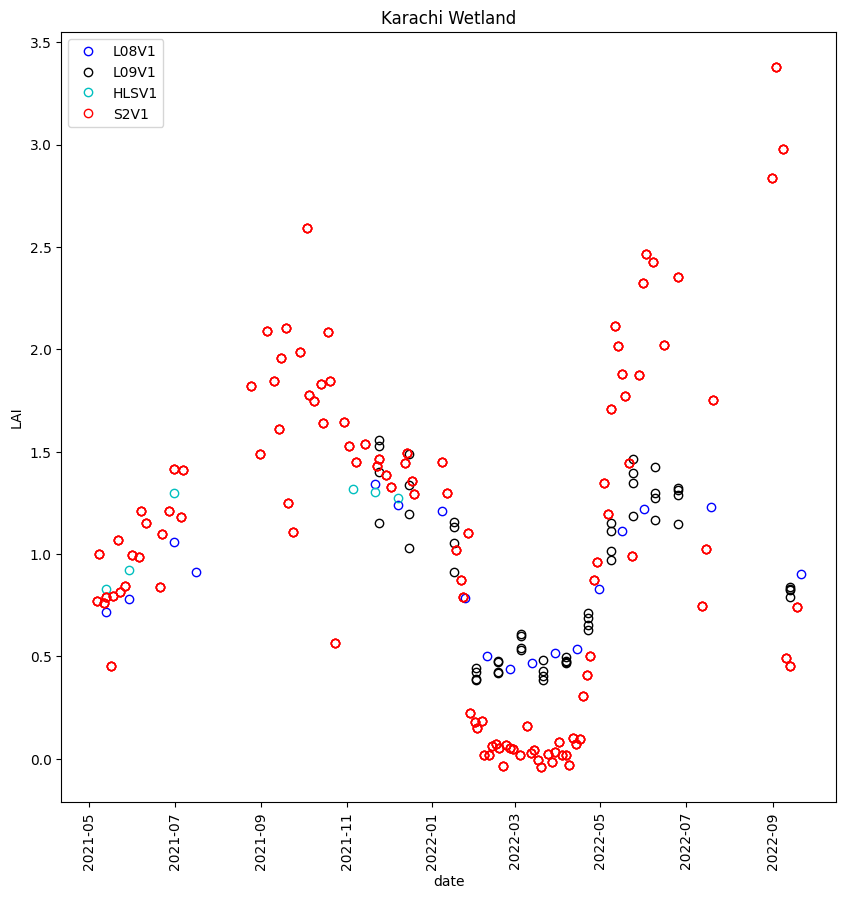

In [767]:
# Choose a site from the sitelist 
siteNum=2

# Select the first feature 
featureNum = 0

#Select one sampled pixel from each feature 
pixelNum = 3

#Extract time series of LAI with high quality only
site = sitesDictionaryL08V0[siteList[siteNum]]
df=site[featureNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL08V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & (df['QC']==0)]
site=sitesDictionaryL09V0[siteList[siteNum]]
df=site[featureNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL09V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]
site=sitesDictionaryHLSV0[siteList[siteNum]]
df=site[featureNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelHLSV0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]
site=sitesDictionaryS2V0[siteList[siteNum]]
df=site[featureNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelS2V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]


fig,ax = plt.subplots(1,1,figsize=[10,10])
plt.plot(pixelL08V0['utc'],pixelL08V0['estimateLAI'],'ob',markerfacecolor='none', label='L08V1')
plt.plot(pixelL09V0['utc'],pixelL09V0['estimateLAI'],'ok',markerfacecolor='none', label='L09V1')
plt.plot(pixelHLSV0['utc'],pixelHLSV0['estimateLAI'],'oc',markerfacecolor='none', label='HLSV1')
plt.plot(pixelS2V0['utc'],pixelS2V0['estimateLAI'],'or',markerfacecolor='none',label='S2V1')

ax.legend()
ax.set_title('Karachi Wetland')
ax.set_xlabel('date')
ax.set_ylabel('LAI')
plt.xticks(rotation=90);

In [759]:
print(pixelS2V0)

               date  QC  longitude   latitude  estimateLAI  partition  \
0     1620922234580   0 -75.794335  45.307432    -0.192295         15   
1     1620922234580   0 -75.793569  45.307437    -0.187067         15   
2     1620922234580   0 -75.793569  45.307437    -0.187067         15   
3     1620922234580   0 -75.793569  45.307437    -0.187067         15   
4     1620922234580   0 -75.792804  45.307443    -0.169688         15   
...             ...  ..        ...        ...          ...        ...   
1172  1664554243058   0 -75.794342  45.307972     1.849591         15   
1173  1664554243058   0 -75.793577  45.307977     1.895486         15   
1174  1664554243058   0 -75.793577  45.307977     1.895486         15   
1175  1664554243058   0 -75.793577  45.307977     1.895486         15   
1176  1664554243058   0 -75.792812  45.307983     1.849684         15   

      networkID  errorLAI                     utc  
0             0  0.156761 2021-05-13 16:10:34.580  
1             0  0.